# **Salary prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Salary_dataset.csv')

In [3]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
data.nunique()

,0
Unnamed: 0,30
YearsExperience,28
Salary,30


In [5]:
data=data.drop('Unnamed: 0',axis=1)
#for dropping unnamed column since it's an unimportant value

In [6]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [9]:
data.isna().sum()

,0
YearsExperience,0
Salary,0


In [10]:
#no missing values

{'whiskers': [<matplotlib.lines.Line2D at 0x7866c1a9c280>,
 'caps': [<matplotlib.lines.Line2D at 0x7866c1a9c7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7866c1c4ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7866c1a9cd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7866c1a9cfa0>],
 'means': []}

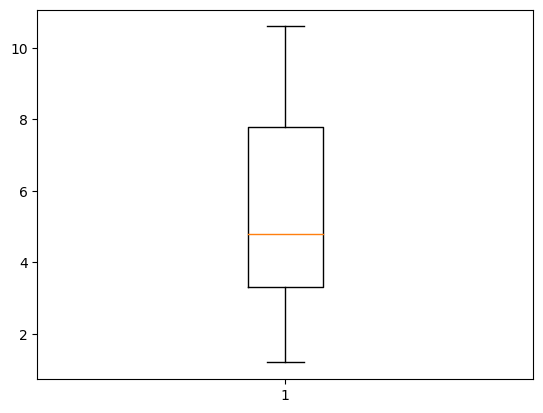

In [11]:
plt.boxplot(data['YearsExperience'])

In [12]:
Q1 = data['YearsExperience'].quantile(0.25)
Q3 = data['YearsExperience'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['YearsExperience'] < lower_bound) | (data['YearsExperience'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []


In [13]:
#no data points identified as outliers according to IQR method and boxplotting.

# Linear regression model

Training the model

In [14]:
x=data[['YearsExperience']]
y=data['Salary'] #target column

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
model=lr.fit(x_train,y_train)

In [18]:
pred=model.predict(x_test)

Evaluating Model Performance

In [19]:
from sklearn.metrics import mean_squared_error
print(f'MSE={mean_squared_error(y_test,pred)}')

MSE=49830096.855908394


In [20]:
from sklearn.metrics import mean_absolute_error
print(f'MAE={mean_absolute_error(y_test,pred)}')

MAE=6286.453830757745


In [21]:
from sklearn.metrics import r2_score
print(f'RsquredValue={r2_score(y_test,pred)}')

RsquredValue=0.9024461774180497


# Polynomial regression model

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
lr2=LinearRegression()
lr2.fit(x_train_poly,y_train)


LinearRegression()

In [23]:
y_pred_poly=lr2.predict(x_test_poly)

In [24]:
print(f'MAE={mean_absolute_error(y_test,y_pred_poly)}')

MAE=6381.371429702194


In [25]:
print(f'MSE={mean_squared_error(y_test,y_pred_poly)}')

MSE=52527916.3687748


In [26]:
print(f'Rsquredvalue={r2_score(y_test,y_pred_poly)}')

Rsquredvalue=0.8971645780890873


# Classification

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
loan=pd.read_csv('/content/Loan_Default.csv')

Getting basic informations from the dataset

In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [30]:
loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [31]:
loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [32]:
loan.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [33]:
loan.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [34]:
loan.isna().sum()/len(loan)*100

,0
ID,0.000000
year,0.000000
loan_limit,2.249277
Gender,0.000000
approv_in_adv,0.610749
loan_type,0.000000
loan_purpose,0.090133
Credit_Worthiness,0.000000
open_credit,0.000000
business_or_commercial,0.000000


Dropping unnecessary columns

In [35]:
#we need to reduce the complexity of data as possible as it can be

In [36]:
loan.drop('ID',axis=1,inplace=True) #since irrelevant

In [37]:
single_unique_col=[col for col in loan.columns if loan[col].nunique()==1]
single_unique_col #since this won't affect model prediction efficiency we can drop this column

['year']

In [38]:
loan.drop(single_unique_col,axis=1,inplace=True)

In [39]:
loan.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

Handling missing values

In [40]:
#Need to handle missing values otherwise it would lead to errors and biases

In [41]:
loan['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [42]:
loan['Gender'] = loan['Gender'].replace('Sex Not Available', pd.NA)
mode_gender = loan['Gender'].mode()[0]
data['Gender'] = loan['Gender'].fillna(mode_gender)

In [43]:
loan['Gender'].unique()

array([<NA>, 'Male', 'Joint', 'Female'], dtype=object)

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
#seperating numerical and categorical columns
numerical_cols=loan.select_dtypes(include=['float64','int64']).columns
categorical_cols=loan.select_dtypes(include=['object','category']).columns

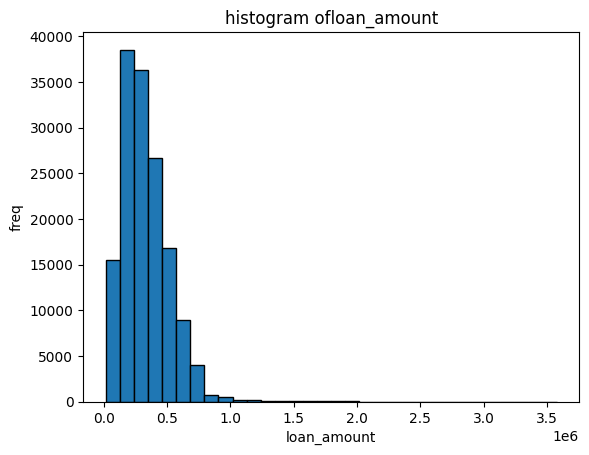

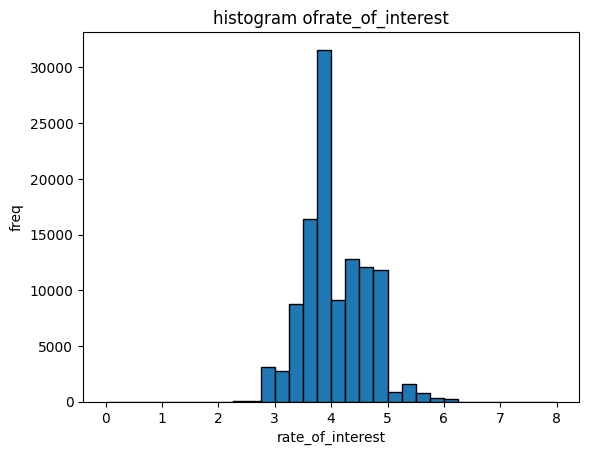

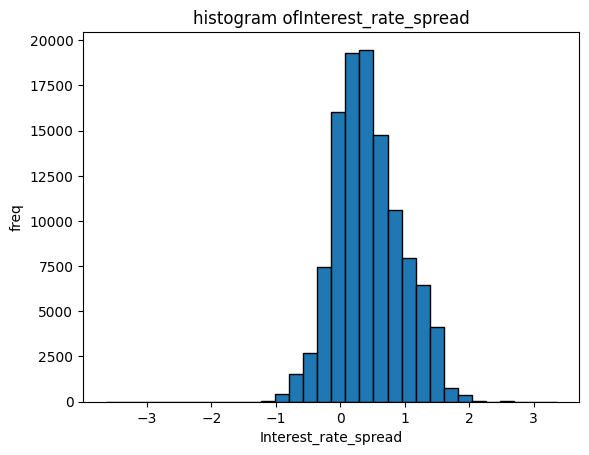

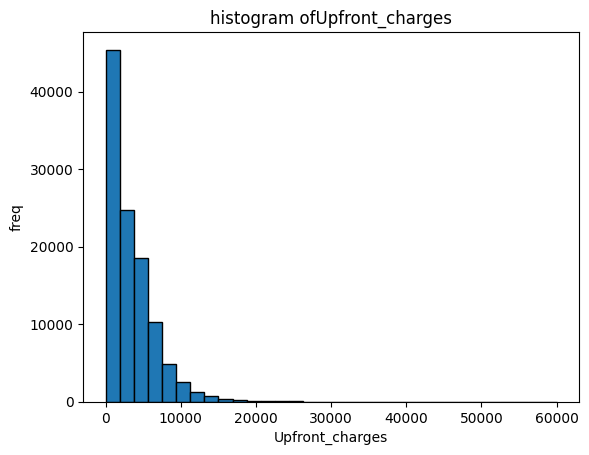

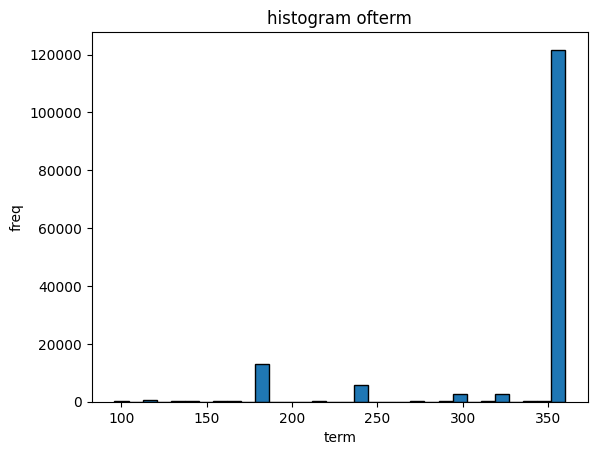

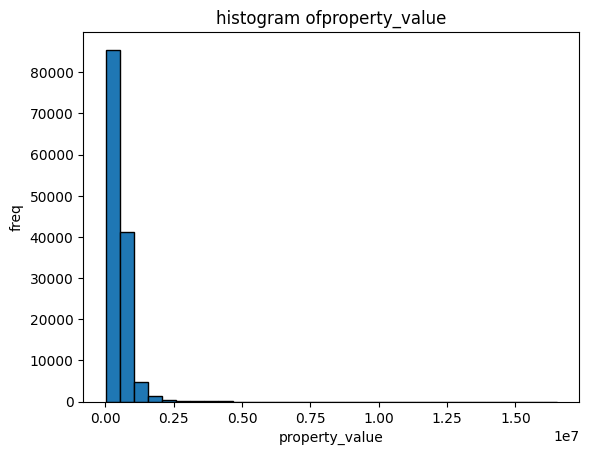

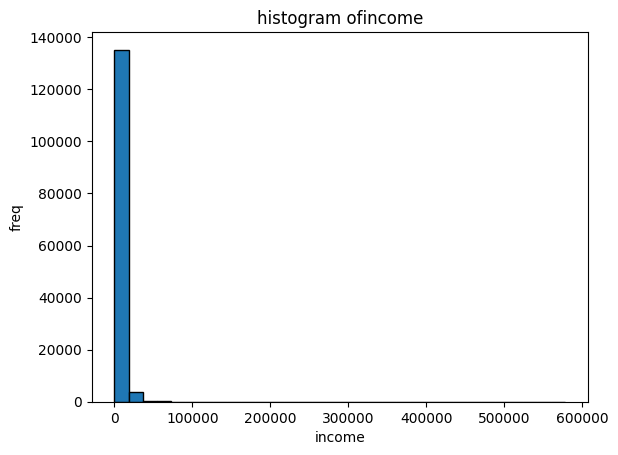

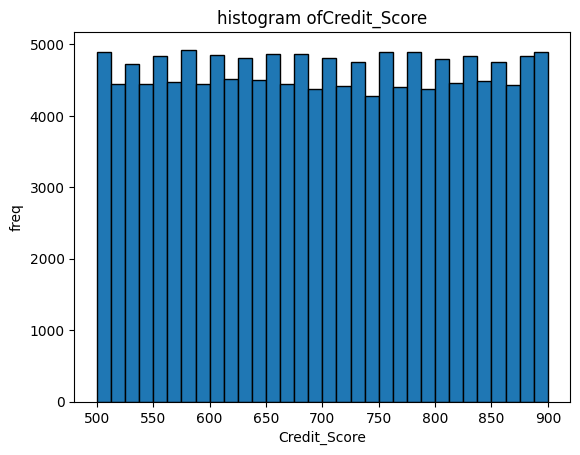

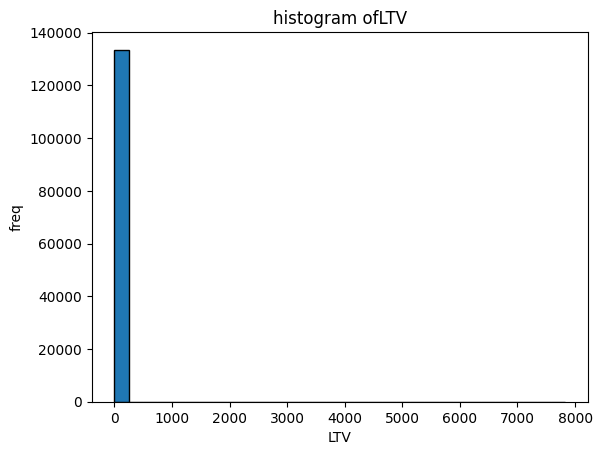

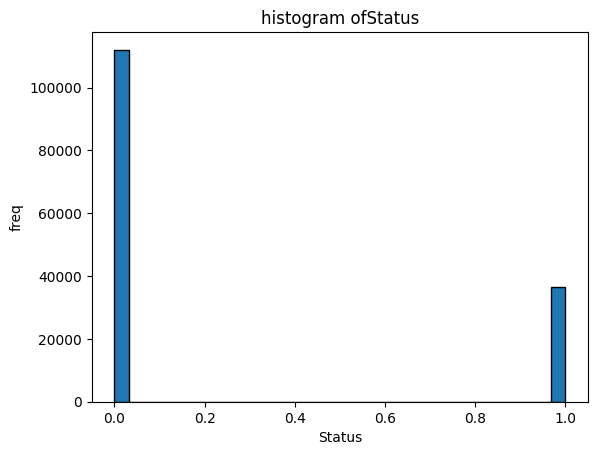

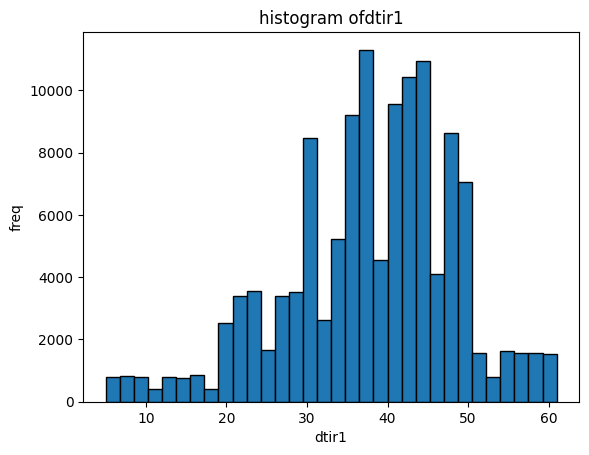

In [46]:
for col in numerical_cols:
  plt.figure()
  plt.hist(loan[col],bins=32,edgecolor='black')
  plt.xlabel(col)
  plt.ylabel('freq')
  plt.title(f'histogram of{col}')

In [47]:
#impute missing values
imputer_num=SimpleImputer(strategy='median')
loan[numerical_cols]=imputer_num.fit_transform(loan[numerical_cols])

loan[categorical_cols] = loan[categorical_cols].astype(str)
imputer_cat=SimpleImputer(strategy='most_frequent')
loan[categorical_cols]=imputer_cat.fit_transform(loan[categorical_cols])

In [48]:
loan.isna().sum()

,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0


In [49]:
#no missing values are present

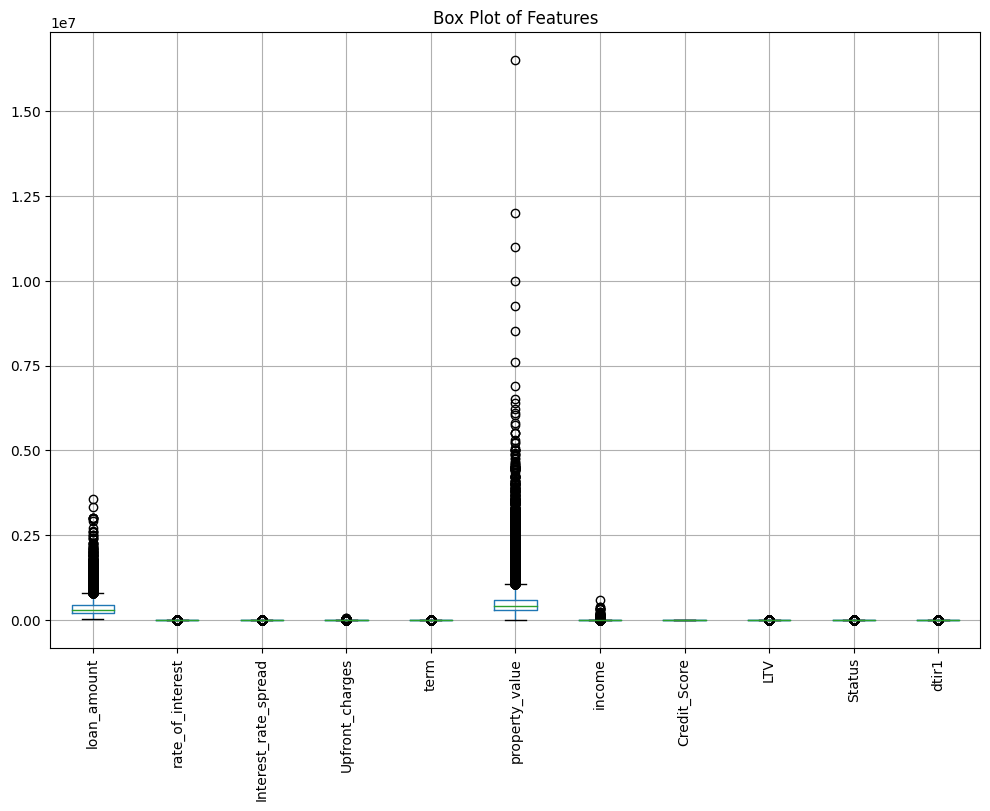

In [50]:
plt.figure(figsize=(12, 8))
loan.boxplot(rot=90)
plt.title('Box Plot of Features')
plt.show()

In [51]:
large_unique_col=['Interest_rate_spread','Upfront_charges','LTV']

In [52]:
for col in large_unique_col:
    q1 = loan[col].quantile(0.25)
    q3 = loan[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers= ((loan[col] < lower_bound) | (loan[col] > upper_bound))
    loan[col] = loan[col].where(~outliers, np.median(loan[col]))

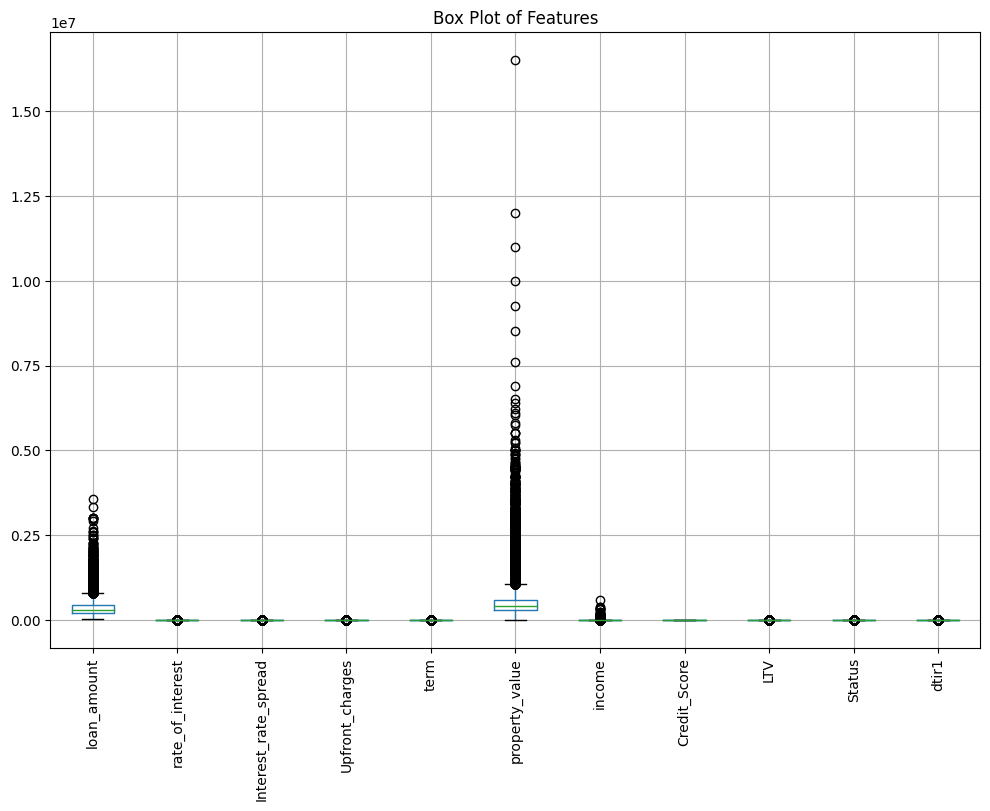

In [53]:
plt.figure(figsize=(12, 8))
loan.boxplot(rot=90)
plt.title('Box Plot of Features')
plt.show()

Encoding

In [54]:
loan.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,<NA>,nopre,type1,p1,l1,nopc,nob/c,116500.0,3.99,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500.0,3.99,...,EQUI,552.0,EXP,55-64,to_inst,75.135870,North,direct,1.0,39.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500.0,4.56,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500.0,4.25,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500.0,4.00,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.0


In [55]:
loan1=loan.copy()

In [56]:
categorical_cols

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
def convert_midpoint (age):
 if '-' in age:
  lower, upper = map(int, age.split('-'))
  return (lower + upper) / 2
 elif '<' in age:
  return float(age.replace('<', '').strip())- 0.5
 elif '>' in age:
  return float(age.replace('>', '').strip()) + 0.5
 return np.nan
loan1['age'] = loan1['age'].apply(convert_midpoint)

In [60]:
loan2=loan1[['Gender','loan_type','loan_purpose','occupancy_type','total_units','credit_type','Region']]

In [61]:
loan2=pd.get_dummies(loan2)
loan2.head()

,Gender_<NA>,Gender_Female,Gender_Joint,Gender_Male,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_nan,loan_purpose_p1,loan_purpose_p2,...,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,Region_North,Region_North-East,Region_central,Region_south
0,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,False,True,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
2,False,False,False,True,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,False,False,True,False,True,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False


In [62]:
for i in loan2:
  loan2[i]=loan2[i].astype('int64')

In [63]:
loan1=loan1.drop(columns=['Gender','loan_type','loan_purpose','occupancy_type','total_units','credit_type','Region'])

In [64]:
loan1 = pd.concat([loan1, loan2], axis=1)

In [65]:
#conversion of categorical values to numerical
loan = pd.get_dummies(loan, columns=categorical_cols, drop_first=True)


In [66]:
loan.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_65-74,age_<25,age_>74,age_nan,submission_of_application_not_inst,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,116500.0,3.99,0.3904,2596.45,360.0,118000.0,1740.0,758.0,98.728814,1.0,...,False,False,False,False,False,True,False,False,True,True
1,206500.0,3.99,0.3904,2596.45,360.0,418000.0,4980.0,552.0,75.135870,1.0,...,False,False,False,False,False,True,False,False,False,True
2,406500.0,4.56,0.2000,595.00,360.0,508000.0,9480.0,834.0,80.019685,0.0,...,False,False,False,False,False,True,False,False,True,True
3,456500.0,4.25,0.6810,2596.45,360.0,658000.0,11880.0,587.0,69.376900,0.0,...,False,False,False,False,True,False,False,False,False,True
4,696500.0,4.00,0.3042,0.00,360.0,758000.0,10440.0,602.0,91.886544,0.0,...,False,False,False,False,True,False,False,False,False,True


Splitting data

In [67]:
from sklearn.model_selection import train_test_split

X = loan.drop('Status', axis=1)
y = loan['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
x1=X.copy()

Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1=scaler.fit_transform(x1)

In [72]:
x1=pd.DataFrame(x1,columns=['Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',])

ValueError: Shape of passed values is (148670, 54), indices imply (148670, 4)

In [ ]:
x2=x.drop(['Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'age', 'LTV', 'dtir1'],axis=1)
x=pd.concat([x1,x2],axis=1)
x.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.fit_transform(x_test)

In [ ]:
#issue with encoding and scaling

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)

In [ ]:
print(x_train.shape)
print(y_train.shape)


In [ ]:
model=lg.fit(x_train,y_train)

In [ ]:
y_pred_lg=lg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_pred_lg))
print('Precision=',precision_score(y_test,y_pred_lg))
print('recall=',recall_score(y_test,y_pred_lg))
print('f1=',f1_score(y_test,y_pred_lg))

kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metrics_k=[]
n=np.arange(3,15)
for k in n:
  clf=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metrics_k.append(acc)

In [ ]:
metrics_k

In [ ]:
plt.plot(n,metrics_k,'o-')
plt.grid()

In [ ]:
clf=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred3=dt_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred3))
print('precision',precision_score(y_test,y_pred3))
print('recall score',recall_score(y_test,y_pred3))

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred4=rf_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred4))
print('precision',precision_score(y_test,y_pred4))
print('recall score',recall_score(y_test,y_pred4))

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_nb=gnb.predict(x_test)

In [ ]:
print('Accuracy',accuracy_score(y_test,y_pred_nb))
print('precision',precision_score(y_test,y_pred_nb))
print('recall score',recall_score(y_test,y_pred_nb))